In [1]:
import pandas as pd # pandas
import seaborn as sns # seaborn package to generate nice plots
sns.set()
import matplotlib.pyplot as plt # matplotlib
import numpy as np # numpy
import scipy.stats as stats
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.stats import norm
import statsmodels.stats.api as sms
from matplotlib.pyplot import figure

In [2]:
def MASE(X,Y,F):
    N1=len(X)
    N2=len(Y)
    D1=np.sum(abs(Y-F))/N2
    D2=np.sum(abs(X[1:]-X[:-1]))/N1
    return (D1/D2)

In [3]:
def RMSSE(X,Y,F):
    h=len(Y)
    n=len(X)
    result=np.sqrt(((1/h)*np.sum((Y-F)**2))/(1/(n-1)*np.sum((X[1:]-X[:-1])**2)))
    return (result)  

In [39]:
def MASE_zero_model(product):
    path="./gen data/"
    DATA_Micro=pd.read_csv(path+product.replace('é','e')+".csv", sep=';',encoding = "ISO-8859-1")
    n1=np.where(DATA_Micro['PeriodsSepLastTwoNnZeroDemands']>0)[0][1]
    n2=2*n1+int((DATA_Micro.shape[0]-n1)*90/100)
    Train_X=DATA_Micro['Qty'][n1:n2].values
    Test_Y=DATA_Micro['Qty'][n2:].values
    pred=[0]*len(Test_Y)
    return MASE(Train_X,Test_Y,pred)

In [41]:
def RMSSE_zero_model(product):
    path="./gen data/"
    DATA_Micro=pd.read_csv(path+product.replace('é','e')+".csv", sep=';',encoding = "ISO-8859-1")
    n1=np.where(DATA_Micro['PeriodsSepLastTwoNnZeroDemands']>0)[0][1]
    n2=2*n1+int((DATA_Micro.shape[0]-n1)*90/100)
    Train_X=DATA_Micro['Qty'][n1:n2].values
    Test_Y=DATA_Micro['Qty'][n2:].values
    pred=[0]*len(Test_Y)
    return RMSSE(Train_X,Test_Y,pred)

In [29]:
df1=pd.read_csv('Bi_LSTM_GRU.csv')
df1

,product,w1,LSTM,BiLSTM,GRU,BiGRU
0,1000030181 PACK PUTIFICATION Q GARD 2,1.000000,0.915986,0.922099,0.900299,0.900299
1,1000030181 PACK PUTIFICATION Q GARD 2,15.349057,0.939534,0.895662,0.932646,0.932646
2,1000030181 PACK PUTIFICATION Q GARD 2,7.674528,0.913571,0.920146,0.908893,0.908893
3,6C5458 tampon (litres),1.000000,0.892899,0.909116,0.894632,0.912671
4,6C5458 tampon (litres),13.598765,0.905084,0.893766,0.888389,0.904607
...,...,...,...,...,...,...
58,KS850 CUVETTES 20 CARTOUCHES,6.976293,0.928828,0.929873,0.924449,0.928150
59,KS850 CUVETTES 20 CARTOUCHES,13.952586,0.926695,0.933051,0.930452,0.930395
60,KS807 SOLUTION NETTOYAGE ECHANTILLONS,1.000000,0.950150,0.956144,0.952233,0.939266
61,KS807 SOLUTION NETTOYAGE ECHANTILLONS,6.787815,0.938347,0.938347,0.935293,0.937959


In [30]:
df1[1:50]

,product,w1,LSTM,BiLSTM,GRU,BiGRU
1,1000030181 PACK PUTIFICATION Q GARD 2,15.349057,0.939534,0.895662,0.932646,0.932646
2,1000030181 PACK PUTIFICATION Q GARD 2,7.674528,0.913571,0.920146,0.908893,0.908893
3,6C5458 tampon (litres),1.000000,0.892899,0.909116,0.894632,0.912671
4,6C5458 tampon (litres),13.598765,0.905084,0.893766,0.888389,0.904607
5,6C5458 tampon (litres),27.197531,0.903652,0.908161,0.915359,0.904430
6,8H5302 CD SAP VENT ASSEMBLY,1.000000,0.807840,0.830998,0.843491,0.850256
7,8H5302 CD SAP VENT ASSEMBLY,13.346154,0.892804,0.918826,0.802507,0.897100
8,8H5302 CD SAP VENT ASSEMBLY,26.692308,0.916226,0.861449,0.857417,0.894831
9,944-157 PACK SOLUTION 680 activités,1.000000,0.682910,0.642903,0.662959,0.635311
10,944-157 PACK SOLUTION 680 activités,7.634615,0.615113,0.665290,0.680685,0.664266


In [31]:
df1['product'].unique()

array(['1000030181 PACK PUTIFICATION Q GARD 2', '6C5458 tampon (litres)',
       '8H5302 CD SAP VENT ASSEMBLY',
       '944-157 PACK SOLUTION 680 activités',
       '946-008 CASSETTES 600 TESTS  30 J', 'TAMPON PBS 1 LITRE',
       'TAMPON PBS   40X', 'T30525C CLOS CHECK DIFFICILE COMPLETE',
       'STA PTT AUTOMATE 5   00595', 'STA NEOPLASTINE   00667',
       'STA DESORB U   00975', 'STA DEFICIENT II',
       'STA CLEANER SOLUTION   00973', 'SCHAEDLER NEO VANCO',
       'ROSENOW CYSTEINE 25T', 'PLASMA DE LAPIN   56352', 'NACL 0.85%',
       'MHF sang cheval boite ronde', 'KS855 CUVETTES REACTION LOCI',
       'KS850 CUVETTES   20 CARTOUCHES',
       'KS807 SOLUTION NETTOYAGE ECHANTILLONS'], dtype=object)

In [32]:
n=df1.shape[0]
W0_5=[df1.iloc[2]['w1']]
W_1=[df1.iloc[1]['w1']]
for i in range (4,n,3):
    W0_5.append(df1.iloc[i]['w1'])
for i in range (5,n,3):
    W_1.append(df1.iloc[i]['w1'])

In [33]:
df1[df1['w1']==1].describe()

,w1,LSTM,BiLSTM,GRU,BiGRU
count,21.0,21.000000,21.000000,21.000000,21.000000
mean,1.0,0.879366,0.879735,0.883557,0.882257
std,0.0,0.094322,0.098936,0.090656,0.086167
min,1.0,0.590309,0.579497,0.642065,0.635311
25%,1.0,0.850081,0.850538,0.845463,0.859138
50%,1.0,0.915480,0.909689,0.900299,0.900299
75%,1.0,0.937978,0.940918,0.946766,0.938695
max,1.0,0.980726,0.983113,0.977535,0.977516


In [34]:
df1.loc[df1['w1'].isin(W0_5)].describe()

,w1,LSTM,BiLSTM,GRU,BiGRU
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.307973,0.880871,0.884145,0.877139,0.890967
std,2.920909,0.081000,0.071509,0.077240,0.072914
min,6.319549,0.615113,0.665290,0.680685,0.664266
25%,7.162234,0.875589,0.869723,0.851615,0.878702
50%,7.674528,0.907462,0.911234,0.906046,0.908893
75%,11.783186,0.919674,0.929873,0.927895,0.928150
max,15.794872,0.970657,0.971095,0.980991,0.974829


In [35]:
df1.loc[df1['w1'].isin(W_1)].describe()

,w1,LSTM,BiLSTM,GRU,BiGRU
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,18.615947,0.888595,0.882397,0.890203,0.888787
std,5.841817,0.084727,0.073157,0.078392,0.072760
min,12.639098,0.628672,0.665042,0.628001,0.664760
25%,14.324468,0.884722,0.884728,0.861043,0.866507
50%,15.349057,0.917939,0.895662,0.907049,0.905925
75%,23.566372,0.931010,0.922260,0.942452,0.932646
max,31.589744,0.974305,0.956318,0.973873,0.978039


In [36]:
df2=pd.read_csv('Reg_res.csv')

In [40]:
df2['MASE_zero']=df2.apply(lambda row: MASE_zero_model(row[0]),axis=1)

In [42]:
df2['RMSSE_zero']=df2.apply(lambda row: RMSSE_zero_model(row[0]),axis=1)

In [43]:
df2

,product,Samples,ADI,CV2,MASE_HM,MASE_NN,MASE_SES,MASE_Cr,MASE_SBA,MASE_RNN,...,RMSSE_Naive,PB_HM,PB_NN,PB_SES,PB_Cr,PB_SBA,PB_RNN,PB_Naive,MASE_zero,RMSSE_zero
0,1000030181 PACK PUTIFICATION Q GARD 2,3424,16.349057,0.217962,0.626011,0.609444,1.060892,1.128471,0.928242,0.609444,...,0.980726,0.827243,0.936667,0.013333,0.033333,0.000000,0.936667,0.910000,0.609444,0.802111
1,6C5458 tampon (litres),2269,28.197531,0.104139,0.569803,0.520773,1.028915,1.016669,11.040975,0.520773,...,0.692753,0.858491,0.966825,0.000000,0.000000,0.018957,0.966825,0.962085,0.520773,0.699932
2,KS850 CUVETTES 20 CARTOUCHES,3464,14.952586,0.134347,0.607572,0.601417,1.081723,1.072043,1.066566,0.601417,...,0.995856,0.897661,0.929619,0.014663,0.011730,0.000000,0.929619,0.891496,0.601417,0.792333
3,GELOSE M HINTON (BTE RONDE),2858,13.483568,0.171120,0.647335,0.597916,1.063766,1.056728,1.036734,0.597916,...,0.768634,0.886029,0.933579,0.003690,0.007380,0.000000,0.933579,0.944649,0.597916,0.827521
4,8H5302 CD SAP VENT ASSEMBLY,1770,27.692308,0.105427,0.702597,0.702597,1.210700,2.670490,14.295850,0.702597,...,1.141752,0.959184,0.965753,0.000000,0.006849,0.027397,0.965753,0.938356,0.702597,0.940523
5,944-157 PACK SOLUTION 680 activités,1676,16.269231,0.142810,0.785986,0.566002,1.058723,7.924024,7.924024,0.566002,...,1.069071,0.736842,0.940397,0.013245,0.046358,0.046358,0.940397,0.880795,0.566002,0.818026
6,946-008 CASSETTES 600 TESTS 30 J,3059,17.643678,0.165764,0.577106,0.577106,1.056140,1.053159,1.046980,0.577106,...,0.967057,0.932203,0.935374,0.013605,0.020408,0.027211,0.935374,0.880952,0.577106,0.710390
7,T30525C CLOS CHECK DIFFICILE COMPLETE,2857,15.324468,0.241116,0.730144,0.664972,1.198224,1.194404,1.222101,0.664972,...,0.964244,0.908397,0.942529,0.000000,0.000000,0.019157,0.942529,0.919540,0.664972,0.906022
8,STA PTT AUTOMATE 5 00595,2988,27.198198,0.111761,0.713701,0.486904,0.903523,0.909133,0.898942,0.486904,...,0.929337,0.858209,0.966292,0.003745,0.014981,0.000000,0.966292,0.943820,0.486904,0.687043
9,STA NEOPLASTINE 00667,2204,25.397727,0.104966,0.894157,0.479255,0.924324,0.918304,0.900203,0.479255,...,0.946457,0.889474,0.968254,0.005291,0.010582,0.000000,0.968254,0.941799,0.479255,0.688876


In [45]:
df2.to_csv('res.csv')

In [ ]:
df2.iloc[:,[0,1,11,12,13,14,15,16,17,26]]

In [18]:
df2.iloc[-1]

product        43451 MRSA ID GELOSE
Samples                        2406
ADI                       14.689024
CV2                        0.359475
MASE_HM                    0.413003
MASE_NN                   28.358246
MASE_SES                   0.739986
MASE_Cr                    0.756182
MASE_SBA                   0.716304
MASE_RNN                   0.407117
MASE_Naive                 0.464368
RMSSE_HM                   0.475418
RMSSE_NN                   8.904319
RMSSE_SES                  0.536851
RMSSE_Cr                   0.536709
RMSSE_SBA                  0.536995
RMSSE_RNN                  0.550222
RMSSE_Naive                0.576258
PB_HM                      0.928571
PB_NN                           0.0
PB_SES                     0.004219
PB_Cr                      0.008439
PB_SBA                     0.004219
PB_RNN                     0.936709
PB_Naive                   0.932489
MASE_zero                  0.407117
RMSSE_zero                 0.550222
Name: 38, dtype: object

In [19]:
df2.median()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_10220/1172267387.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.median()


Samples        2706.000000
ADI              14.952586
CV2               0.165764
MASE_HM           0.569803
MASE_NN           0.526019
MASE_SES          0.924324
MASE_Cr           0.944690
MASE_SBA          0.934088
MASE_RNN          0.501824
MASE_Naive        0.578095
RMSSE_HM          0.679319
RMSSE_NN          0.747767
RMSSE_SES         0.678001
RMSSE_Cr          0.676868
RMSSE_SBA         0.691383
RMSSE_RNN         0.703492
RMSSE_Naive       0.774516
PB_HM             0.897661
PB_NN             0.940397
PB_SES            0.003690
PB_Cr             0.008065
PB_SBA            0.000000
PB_RNN            0.940397
PB_Naive          0.927152
MASE_zero         0.483415
RMSSE_zero        0.693597
dtype: float64

In [20]:
df2.mean()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_10220/3587575296.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.mean()


Samples        2561.589744
ADI              16.453470
CV2               0.215441
MASE_HM           0.597996
MASE_NN           2.835018
MASE_SES          0.896528
MASE_Cr           1.167590
MASE_SBA          2.016236
MASE_RNN          1.558050
MASE_Naive        0.651054
RMSSE_HM          0.653153
RMSSE_NN          1.409717
RMSSE_SES         0.660998
RMSSE_Cr          0.717267
RMSSE_SBA         0.918918
RMSSE_RNN         1.017877
RMSSE_Naive       0.758712
PB_HM             0.878211
PB_NN             0.847196
PB_SES            0.005039
PB_Cr             0.011640
PB_SBA            0.008606
PB_RNN            0.895327
PB_Naive          0.924244
MASE_zero         0.478114
RMSSE_zero        0.677590
dtype: float64

In [21]:
df2.describe().iloc[:,0:3]

,Samples,ADI,CV2
count,39.000000,39.000000,39.000000
mean,2561.589744,16.453470,0.215441
std,606.648243,4.113202,0.184047
min,1349.000000,11.769231,0.057116
25%,2236.500000,14.018390,0.118620
50%,2706.000000,14.952586,0.165764
75%,2894.000000,16.872804,0.235142
max,3478.000000,28.197531,1.012994


In [22]:
df2.describe().iloc[:,[3,4,5,6,7,8,9,24]]

,MASE_HM,MASE_NN,MASE_SES,MASE_Cr,MASE_SBA,MASE_RNN,MASE_Naive,MASE_zero
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.597996,2.835018,0.896528,1.167590,2.016236,1.558050,0.651054,0.478114
std,0.262520,7.095110,0.190216,1.199985,3.049460,4.676141,0.253374,0.119650
min,0.197789,0.104370,0.238434,0.240259,0.230241,0.104370,0.170787,0.104370
25%,0.456189,0.419038,0.772167,0.784659,0.768130,0.407616,0.453070,0.405125
50%,0.569803,0.526019,0.924324,0.944690,0.934088,0.501824,0.578095,0.483415
75%,0.672788,0.598993,1.033534,1.054944,1.059204,0.575621,0.867250,0.567294
max,1.887659,28.358246,1.210700,7.924024,14.295850,21.840896,1.104082,0.702597


In [23]:
df2.describe().iloc[:,[10,11,12,13,14,15,16,25]]

,RMSSE_HM,RMSSE_NN,RMSSE_SES,RMSSE_Cr,RMSSE_SBA,RMSSE_RNN,RMSSE_Naive,RMSSE_zero
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.653153,1.409717,0.660998,0.717267,0.918918,1.017877,0.758712,0.677590
std,0.183839,2.169055,0.150869,0.354823,0.704408,1.448572,0.220293,0.155313
min,0.298976,0.159077,0.156795,0.156690,0.156341,0.159077,0.224969,0.159077
25%,0.541019,0.641102,0.571432,0.570678,0.610635,0.626133,0.606277,0.585238
50%,0.679319,0.747767,0.678001,0.676868,0.691383,0.703492,0.774516,0.693597
75%,0.726279,0.818689,0.764977,0.774636,0.796043,0.803309,0.937897,0.790432
max,1.382069,8.904319,0.926325,2.622069,3.627488,7.270863,1.141752,0.940523


In [24]:
df2[df2['ADI']<20].mean()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_10220/371936526.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['ADI']<20].mean()


Samples        2611.617647
ADI              15.063734
CV2               0.228391
MASE_HM           0.577955
MASE_NN           3.173916
MASE_SES          0.882541
MASE_Cr           1.151054
MASE_SBA          1.486180
MASE_RNN          1.709159
MASE_Naive        0.620121
RMSSE_HM          0.642298
RMSSE_NN          1.509331
RMSSE_SES         0.652237
RMSSE_Cr          0.714969
RMSSE_SBA         0.806192
RMSSE_RNN         1.059868
RMSSE_Naive       0.734883
PB_HM             0.881977
PB_NN             0.829782
PB_SES            0.005514
PB_Cr             0.012398
PB_SBA            0.008049
PB_RNN            0.884991
PB_Naive          0.921923
MASE_zero         0.470410
RMSSE_zero        0.669539
dtype: float64

In [25]:
df2[df2['Samples']>3400].mean()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_10220/353431106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Samples']>3400].mean()


Samples        3451.333333
ADI              15.003857
CV2               0.142164
MASE_HM           0.603054
MASE_NN           0.594533
MASE_SES          1.077083
MASE_Cr           1.087704
MASE_SBA          0.999458
MASE_RNN          0.594533
MASE_Naive        0.931788
RMSSE_HM          0.735435
RMSSE_NN          0.784274
RMSSE_SES         0.759161
RMSSE_Cr          0.758945
RMSSE_SBA         0.760832
RMSSE_RNN         0.784274
RMSSE_Naive       0.984223
PB_HM             0.899035
PB_NN             0.930857
PB_SES            0.010788
PB_Cr             0.029496
PB_SBA            0.000000
PB_RNN            0.930857
PB_Naive          0.892819
MASE_zero         0.594533
RMSSE_zero        0.784274
dtype: float64

In [26]:
df2.head()

,product,Samples,ADI,CV2,MASE_HM,MASE_NN,MASE_SES,MASE_Cr,MASE_SBA,MASE_RNN,...,RMSSE_Naive,PB_HM,PB_NN,PB_SES,PB_Cr,PB_SBA,PB_RNN,PB_Naive,MASE_zero,RMSSE_zero
0,1000030181 PACK PUTIFICATION Q GARD 2,3424,16.349057,0.217962,0.626011,0.609444,1.060892,1.128471,0.928242,0.609444,...,0.980726,0.827243,0.936667,0.013333,0.033333,0.000000,0.936667,0.910000,0.609444,0.802111
1,6C5458 tampon (litres),2269,28.197531,0.104139,0.569803,0.520773,1.028915,1.016669,11.040975,0.520773,...,0.692753,0.858491,0.966825,0.000000,0.000000,0.018957,0.966825,0.962085,0.520773,0.699932
2,KS850 CUVETTES 20 CARTOUCHES,3464,14.952586,0.134347,0.607572,0.601417,1.081723,1.072043,1.066566,0.601417,...,0.995856,0.897661,0.929619,0.014663,0.011730,0.000000,0.929619,0.891496,0.601417,0.792333
3,GELOSE M HINTON (BTE RONDE),2858,13.483568,0.171120,0.647335,0.597916,1.063766,1.056728,1.036734,0.597916,...,0.768634,0.886029,0.933579,0.003690,0.007380,0.000000,0.933579,0.944649,0.597916,0.827521
4,8H5302 CD SAP VENT ASSEMBLY,1770,27.692308,0.105427,0.702597,0.702597,1.210700,2.670490,14.295850,0.702597,...,1.141752,0.959184,0.965753,0.000000,0.006849,0.027397,0.965753,0.938356,0.702597,0.940523


In [27]:
bins = pd.IntervalIndex.from_tuples([(10, 12.5), (12.5, 15), (15, 17.5), (17.5, 20), (20, 22.5), (22.5, 25), (25, 27.5), (27.5, 30)])
df2['ADIBand'] = pd.cut(df2['ADI'], bins)
df2[['ADIBand', 'RMSSE_HM','RMSSE_RNN','RMSSE_NN','RMSSE_Cr','RMSSE_SBA','RMSSE_SES','RMSSE_Naive','RMSSE_zero']].groupby(['ADIBand'], as_index=False).mean()

,ADIBand,RMSSE_HM,RMSSE_RNN,RMSSE_NN,RMSSE_Cr,RMSSE_SBA,RMSSE_SES,RMSSE_Naive,RMSSE_zero
0,"(10.0, 12.5]",0.482188,0.563903,0.563903,0.545324,0.545272,0.546583,0.579076,0.563903
1,"(12.5, 15.0]",0.634249,0.995598,1.759685,0.672121,0.827217,0.656304,0.693383,0.674693
2,"(15.0, 17.5]",0.655490,1.422158,1.422158,0.846603,0.846645,0.644261,0.788958,0.660705
3,"(17.5, 20.0]",0.692887,0.690054,0.690054,0.675445,0.675282,0.676262,0.859668,0.690054
4,"(20.0, 22.5]",0.629643,0.645336,0.645336,0.631985,0.632475,0.633105,0.893427,0.645336
5,"(22.5, 25.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"(25.0, 27.5]",0.687709,0.687960,0.687960,0.676280,0.676327,0.677321,0.937897,0.687960
7,"(27.5, 30.0]",0.814885,0.820227,0.820227,0.839968,3.221056,0.807545,0.917252,0.820227


In [28]:
for p in range (8):
    L=df2[['ADIBand', 'RMSSE_HM','RMSSE_RNN','RMSSE_NN','RMSSE_Cr','RMSSE_SBA','RMSSE_SES','RMSSE_Naive','RMSSE_zero']].groupby(['ADIBand'], as_index=False).mean().iloc[p].values.tolist()[1:]
    s=''
    for i in range (len(L)):
        s+=str(round(L[i],3))+' & '
    print(s)

0.482 & 0.564 & 0.564 & 0.545 & 0.545 & 0.547 & 0.579 & 0.564 & 
0.634 & 0.996 & 1.76 & 0.672 & 0.827 & 0.656 & 0.693 & 0.675 & 
0.655 & 1.422 & 1.422 & 0.847 & 0.847 & 0.644 & 0.789 & 0.661 & 
0.693 & 0.69 & 0.69 & 0.675 & 0.675 & 0.676 & 0.86 & 0.69 & 
0.63 & 0.645 & 0.645 & 0.632 & 0.632 & 0.633 & 0.893 & 0.645 & 
nan & nan & nan & nan & nan & nan & nan & nan & 
0.688 & 0.688 & 0.688 & 0.676 & 0.676 & 0.677 & 0.938 & 0.688 & 
0.815 & 0.82 & 0.82 & 0.84 & 3.221 & 0.808 & 0.917 & 0.82 & 


In [29]:
bins = pd.IntervalIndex.from_tuples([(1000, 1500), (1500, 2000), (2000, 2500), (2500, 3000),(3000, 3500)])
df2['SamplesBand'] = pd.cut(df2['Samples'], bins)
df2[['SamplesBand', 'RMSSE_HM','RMSSE_NN','RMSSE_RNN','RMSSE_SES','RMSSE_Cr','RMSSE_SBA','RMSSE_Naive','RMSSE_zero']].groupby(['SamplesBand'], as_index=False).mean()

,SamplesBand,RMSSE_HM,RMSSE_NN,RMSSE_RNN,RMSSE_SES,RMSSE_Cr,RMSSE_SBA,RMSSE_Naive,RMSSE_zero
0,"(1000, 1500]",0.783947,0.634661,0.634661,0.617424,0.727460,1.376849,0.618255,0.634661
1,"(1500, 2000]",0.740662,2.121699,0.736170,0.720774,1.097904,1.625108,0.875199,0.736170
2,"(2000, 2500]",0.595372,1.966058,1.206595,0.610450,0.609669,0.802980,0.683800,0.623131
3,"(2500, 3000]",0.580030,1.227516,1.227516,0.640672,0.639834,0.735052,0.691361,0.656427
4,"(3000, 3500]",0.738543,0.763704,0.763704,0.739968,0.739646,0.741037,0.942607,0.763704


In [30]:
for p in range (4):
    L=df2[['SamplesBand', 'RMSSE_HM','RMSSE_RNN','RMSSE_NN','RMSSE_Cr','RMSSE_SBA','RMSSE_SES','RMSSE_Naive','RMSSE_zero']].groupby(['SamplesBand'], as_index=False).mean().iloc[p].values.tolist()[1:]
    s=''
    for i in range (len(L)):
        s+=str(round(L[i],3))+' & '
    print(s)

0.784 & 0.635 & 0.635 & 0.727 & 1.377 & 0.617 & 0.618 & 0.635 & 
0.741 & 0.736 & 2.122 & 1.098 & 1.625 & 0.721 & 0.875 & 0.736 & 
0.595 & 1.207 & 1.966 & 0.61 & 0.803 & 0.61 & 0.684 & 0.623 & 
0.58 & 1.228 & 1.228 & 0.64 & 0.735 & 0.641 & 0.691 & 0.656 & 


In [31]:
bins = pd.IntervalIndex.from_tuples([(0,0.49) ,  (0.5,1.02)])
df2['CV2Band'] = pd.cut(df2['CV2'], bins)
df2[['CV2Band', 'RMSSE_HM','RMSSE_NN','RMSSE_RNN','RMSSE_SES','RMSSE_Cr','RMSSE_SBA','RMSSE_Naive','RMSSE_zero']].groupby(['CV2Band'], as_index=False).mean()

,CV2Band,RMSSE_HM,RMSSE_NN,RMSSE_RNN,RMSSE_SES,RMSSE_Cr,RMSSE_SBA,RMSSE_Naive,RMSSE_zero
0,"(0.0, 0.49]",0.640544,1.458644,1.045624,0.670025,0.729315,0.880671,0.771426,0.686943
1,"(0.5, 1.02]",0.886406,0.504570,0.504570,0.493982,0.494390,1.626471,0.523487,0.504570


In [32]:
for p in range (2):
    L=df2[['CV2Band', 'RMSSE_HM','RMSSE_RNN','RMSSE_NN','RMSSE_Cr','RMSSE_SBA','RMSSE_SES','RMSSE_Naive','RMSSE_zero']].groupby(['CV2Band'], as_index=False).mean().iloc[p].values.tolist()[1:]
    s=''
    for i in range (len(L)):
        s+=str(round(L[i],3))+' & '
    print(s)

0.641 & 1.046 & 1.459 & 0.729 & 0.881 & 0.67 & 0.771 & 0.687 & 
0.886 & 0.505 & 0.505 & 0.494 & 1.626 & 0.494 & 0.523 & 0.505 & 


In [33]:
from scipy.stats import pearsonr,spearmanr,kendalltau
products=df2['product'].values

In [34]:
QM=[[],[]]
QI=[[],[]]
QP=[[],[]]
QL=[[],[]]
IM=[[],[]]
IL=[[],[]]
IP=[[],[]]
for prod in products:
    df_testing=pd.read_csv("./gen data/"+prod+".csv", sep=';',encoding = "ISO-8859-1")
    Test1=df_testing[df_testing['ZNZDemand']==1]
    Test1.fillna(method='bfill',inplace=True)
    for i in range (2):
        QM[i].append(pearsonr(Test1['Quantite'], Test1['Month'])[i])
        QI[i].append(pearsonr(Test1['Quantite'], Test1['Interval'])[i])
        IM[i].append(pearsonr(Test1['Month'], Test1['Interval'])[i])
        IP[i].append(pearsonr(Test1['Interval'], Test1['PeriodsSepLastTwoNnZeroDemands'])[i])
        QP[i].append(pearsonr(Test1['Quantite'], Test1['PeriodsSepLastTwoNnZeroDemands'])[i])
        IL[i].append(pearsonr(Test1['Interval'], Test1['LastQtte'])[i])
        QL[i].append(pearsonr(Test1['Quantite'], Test1['LastQtte'])[i])
df_stat=pd.DataFrame(data={'QM_r':QM[0],'QM_p':QM[1],'QI_r':QI[0],'QI_p':QI[1]
                          ,'IM_r':IM[0],'IM_p':IM[1],'IP_r':IP[0],'IP_p':IP[1],
                          'QP_r':QP[0],'QP_p':QP[1],'IL_r':IL[0],'IL_p':IL[1],
                          'QL_r':QL[0],'QL_p':QL[1]})
df_stat.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

C:\anaconda\envs\Deeplearning\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,QM_r,QM_p,QI_r,QI_p,IM_r,IM_p,IP_r,IP_p,QP_r,QP_p,IL_r,IL_p,QL_r,QL_p
count,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01
mean,0.004949,0.507400,0.176030,2.052333e-01,-0.083373,0.293753,-0.023969,3.242282e-01,0.022989,4.269898e-01,0.190057,1.740014e-01,0.033300,4.379979e-01
std,0.089376,0.292299,0.216644,2.909631e-01,0.092491,0.289523,0.154407,3.225431e-01,0.129708,3.354548e-01,0.166786,2.515060e-01,0.149276,3.546670e-01
min,-0.240919,0.012635,-0.384689,4.603464e-25,-0.234765,0.002043,-0.206903,7.656742e-10,-0.232494,8.557636e-10,-0.131000,2.062292e-15,-0.216944,8.518532e-12
10%,-0.133573,0.130865,-0.008479,8.947530e-08,-0.186875,0.017428,-0.193261,1.288723e-02,-0.093251,9.892526e-03,-0.027601,4.575148e-08,-0.106116,2.663024e-02
25%,-0.032025,0.236392,0.054696,7.190565e-04,-0.152770,0.043629,-0.125521,7.829960e-02,-0.056031,1.409737e-01,0.086486,2.013709e-04,-0.059710,1.198464e-01
50%,0.013352,0.510577,0.165848,5.131748e-02,-0.097074,0.154428,-0.047515,1.909376e-01,-0.003458,3.263096e-01,0.172488,1.797865e-02,0.001991,3.355698e-01
75%,0.053792,0.728346,0.221630,3.678640e-01,-0.048333,0.491788,0.038701,5.923533e-01,0.092867,7.043980e-01,0.306520,3.023700e-01,0.088540,7.567028e-01
90%,0.085894,0.909635,0.531744,5.961925e-01,0.044992,0.669886,0.125936,8.901878e-01,0.160980,9.206664e-01,0.402064,5.902097e-01,0.179524,9.601296e-01
max,0.200551,0.966059,0.773660,9.946775e-01,0.162358,0.940203,0.532461,9.662913e-01,0.531173,9.859547e-01,0.652626,7.986756e-01,0.580461,9.978336e-01


In [35]:
df_stat[df_stat['IM_p']<=0.05].describe()

,QM_r,QM_p,QI_r,QI_p,IM_r,IM_p,IP_r,IP_p,QP_r,QP_p,IL_r,IL_p,QL_r,QL_p
count,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.000000
mean,0.004391,0.567122,0.120858,4.346520e-01,-0.179431,0.018472,-0.018437,0.253473,0.027993,0.253244,0.277448,1.067703e-02,-0.020875,0.395734
std,0.092295,0.292855,0.162764,4.173030e-01,0.031478,0.011509,0.167629,0.341240,0.096500,0.152654,0.179297,1.957581e-02,0.085082,0.355900
min,-0.240919,0.020701,-0.001157,4.221092e-08,-0.234765,0.002043,-0.200312,0.000618,-0.113404,0.075242,-0.131000,1.277826e-12,-0.125100,0.057086
25%,0.010678,0.423353,0.021406,2.605340e-02,-0.202765,0.011337,-0.108121,0.022763,-0.066477,0.135239,0.191886,1.145825e-07,-0.083143,0.098491
50%,0.024256,0.612525,0.055399,4.171609e-01,-0.173490,0.018682,-0.084257,0.107160,0.063144,0.247686,0.340303,2.858409e-05,-0.034100,0.278656
75%,0.043311,0.814788,0.157939,7.796136e-01,-0.157069,0.027308,0.016641,0.295097,0.098133,0.305580,0.395115,1.027409e-02,0.019676,0.657664
max,0.096754,0.869872,0.533967,9.946775e-01,-0.132754,0.037065,0.350341,0.966291,0.159227,0.510592,0.475478,5.320046e-02,0.120199,0.997834


In [36]:
QM=[[],[]]
QI=[[],[]]
QP=[[],[]]
QL=[[],[]]
IM=[[],[]]
IL=[[],[]]
IP=[[],[]]
for prod in products:
    df_testing=pd.read_csv("./gen data/"+prod+".csv", sep=';',encoding = "ISO-8859-1")
    Test1=df_testing[df_testing['ZNZDemand']==1]
    Test1.fillna(method='bfill',inplace=True)
    for i in range (2):
        QM[i].append(kendalltau(Test1['Quantite'], Test1['Month'])[i])
        QI[i].append(kendalltau(Test1['Quantite'], Test1['Interval'])[i])
        IM[i].append(kendalltau(Test1['Month'], Test1['Interval'])[i])
        IP[i].append(kendalltau(Test1['Interval'], Test1['PeriodsSepLastTwoNnZeroDemands'])[i])
        QP[i].append(kendalltau(Test1['Quantite'], Test1['PeriodsSepLastTwoNnZeroDemands'])[i])
        IL[i].append(kendalltau(Test1['Interval'], Test1['LastQtte'])[i])
        QL[i].append(kendalltau(Test1['Quantite'], Test1['LastQtte'])[i])
df_stat1=pd.DataFrame(data={'QM_r':QM[0],'QM_p':QM[1],'QI_r':QI[0],'QI_p':QI[1]
                          ,'IM_r':IM[0],'IM_p':IM[1],'IP_r':IP[0],'IP_p':IP[1],
                          'QP_r':QP[0],'QP_p':QP[1],'IL_r':IL[0],'IL_p':IL[1],
                          'QL_r':QL[0],'QL_p':QL[1]})
df_stat1.describe(percentiles=[0.1,0.25,0.5,0.75])

C:\anaconda\envs\Deeplearning\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,QM_r,QM_p,QI_r,QI_p,IM_r,IM_p,IP_r,IP_p,QP_r,QP_p,IL_r,IL_p,QL_r,QL_p
count,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01
mean,-0.001688,0.484780,0.133124,1.945724e-01,-0.058506,0.330030,-0.113694,1.445801e-01,0.008372,5.418167e-01,0.106978,2.071593e-01,0.026915,3.400991e-01
std,0.069261,0.304541,0.152090,2.854492e-01,0.068828,0.298094,0.101451,2.426948e-01,0.080009,2.852950e-01,0.091492,2.555983e-01,0.133572,3.340355e-01
min,-0.160974,0.025817,-0.222103,9.596485e-16,-0.200006,0.002392,-0.260717,4.068833e-07,-0.149076,1.394214e-07,-0.070704,5.755164e-10,-0.174786,2.930424e-14
10%,-0.099429,0.061796,-0.003541,1.601340e-07,-0.140100,0.015999,-0.209706,6.165616e-05,-0.052153,9.342668e-02,0.008926,2.457080e-03,-0.131038,4.741343e-03
25%,-0.046088,0.229890,0.070191,1.360975e-03,-0.109775,0.039726,-0.177365,4.673919e-03,-0.035352,3.898551e-01,0.060007,6.008924e-03,-0.055100,4.267199e-02
50%,0.007866,0.545296,0.116897,6.555054e-02,-0.056930,0.293443,-0.129439,3.937054e-02,-0.002537,5.383240e-01,0.087704,1.235127e-01,0.018644,2.735290e-01
75%,0.035625,0.763999,0.165967,2.424478e-01,-0.018818,0.567179,-0.079196,1.197556e-01,0.041495,7.715848e-01,0.159299,2.343436e-01,0.081022,6.095941e-01
max,0.146816,0.959805,0.512138,9.677120e-01,0.128796,0.969611,0.275098,8.555105e-01,0.357501,9.964497e-01,0.420438,9.119162e-01,0.486259,9.935858e-01


In [45]:
df_stat1[df_stat1['IM_p']<=0.05]['IM_r']

11   -0.139140
16   -0.158205
21   -0.107677
23   -0.096885
24   -0.158019
26   -0.200006
27    0.128796
30   -0.133180
32   -0.143938
34   -0.113766
36   -0.132406
Name: IM_r, dtype: float64

In [37]:
df_stat1[df_stat1['IM_p']<=0.05].describe()

,QM_r,QM_p,QI_r,QI_p,IM_r,IM_p,IP_r,IP_p,QP_r,QP_p,IL_r,IL_p,QL_r,QL_p
count,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01
mean,0.006710,0.374452,0.106503,2.091422e-01,-0.114039,0.021218,-0.093309,0.184289,0.014529,0.522275,0.113325,0.206504,0.037988,2.937058e-01
std,0.092406,0.337434,0.155991,2.548269e-01,0.085327,0.013425,0.095512,0.314549,0.066225,0.277868,0.077947,0.298102,0.169966,2.957105e-01
min,-0.160974,0.025817,-0.087176,2.942951e-08,-0.200006,0.002392,-0.205875,0.000609,-0.149076,0.018863,-0.007013,0.000676,-0.152026,2.930424e-14
25%,-0.033169,0.039371,0.038557,4.217403e-02,-0.150978,0.008871,-0.146586,0.012162,-0.005089,0.407816,0.077005,0.005132,-0.072737,4.837954e-02
50%,0.014960,0.326866,0.079548,1.494843e-01,-0.133180,0.022629,-0.115897,0.033644,0.029431,0.517255,0.088758,0.112021,0.032735,2.735290e-01
75%,0.064282,0.710619,0.108341,2.424478e-01,-0.110722,0.031427,-0.053194,0.140171,0.047162,0.714476,0.159299,0.206970,0.072179,4.209123e-01
max,0.144064,0.849869,0.444846,8.759524e-01,0.128796,0.042383,0.116060,0.855510,0.117079,0.914755,0.265917,0.911916,0.486259,9.431726e-01


In [43]:
df_stat1[df_stat1['QM_p']<=0.05].describe()

,QM_r,QM_p,QI_r,QI_p,IM_r,IM_p,IP_r,IP_p,QP_r,QP_p,IL_r,IL_p,QL_r,QL_p
count,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,-0.004328,0.033343,0.111479,3.061278e-01,-0.147690,0.020294,-0.082233,0.043778,0.046743,0.582915,0.141562,0.074409,-0.023744,0.315047
std,0.156430,0.009148,0.232509,3.891923e-01,0.038406,0.016595,0.136886,0.052958,0.051156,0.357106,0.085001,0.055698,0.101693,0.205830
min,-0.160974,0.025817,-0.087176,2.942951e-08,-0.200006,0.007021,-0.197778,0.002218,0.005964,0.144148,0.085995,0.000924,-0.152026,0.006380
25%,-0.127244,0.028065,-0.015271,1.121132e-01,-0.157955,0.007783,-0.147933,0.014357,0.010426,0.368839,0.087277,0.046688,-0.081240,0.310583
50%,-0.000201,0.030535,0.044122,1.742794e-01,-0.141539,0.015887,-0.123607,0.026023,0.031965,0.636379,0.107169,0.086982,-0.005931,0.415313
75%,0.122715,0.035814,0.170872,3.682940e-01,-0.131274,0.028398,-0.057908,0.055445,0.068282,0.850455,0.161454,0.114703,0.051564,0.419777
max,0.144064,0.046486,0.444846,8.759524e-01,-0.107677,0.042383,0.116060,0.120848,0.117079,0.914755,0.265917,0.122749,0.068912,0.423183


In [39]:
test_stat=pd.DataFrame({'Value':df_stat1['QM_r'],'Correlation with':'Month','Score':"Kendall's Tau"})
test_stat1=pd.DataFrame({'Value':df_stat1['QM_p'],'Correlation with':'Month','Score':"p-value"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['QI_r'],'Correlation with':'Demand \n interval','Score':"Kendall's Tau"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['QI_p'],'Correlation with':'Demand \n interval','Score':"p-value"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['QP_r'],'Correlation with':'Periods \n SLTNZD','Score':"Kendall's Tau"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['QP_p'],'Correlation with':'Periods \n SLTNZD','Score':"p-value"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['QL_r'],'Correlation with':'Last \n demand size','Score':"Kendall's Tau"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['QL_p'],'Correlation with':'Last \n demand size','Score':"p-value"})
test_stat=pd.concat([test_stat,test_stat1])

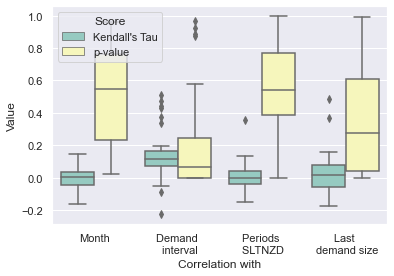

In [40]:
ax = sns.boxplot(x="Correlation with", y="Value", hue="Score",data=test_stat, palette="Set3")

In [41]:
test_stat=pd.DataFrame({'Value':df_stat1['IM_r'],'Correlation with':'Month','Score':"Kendall's Tau"})
test_stat1=pd.DataFrame({'Value':df_stat1['IM_p'],'Correlation with':'Month','Score':"p-value"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['QI_r'],'Correlation with':'Demand \n size','Score':"Kendall's Tau"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['QI_p'],'Correlation with':'Demand \n size','Score':"p-value"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['IP_r'],'Correlation with':'Periods \n SLTNZD','Score':"Kendall's Tau"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['IP_p'],'Correlation with':'Periods \n SLTNZD','Score':"p-value"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['IL_r'],'Correlation with':'Last \n demand size','Score':"Kendall's Tau"})
test_stat=pd.concat([test_stat,test_stat1])
test_stat1=pd.DataFrame({'Value':df_stat1['IL_p'],'Correlation with':'Last \n demand size','Score':"p-value"})
test_stat=pd.concat([test_stat,test_stat1])

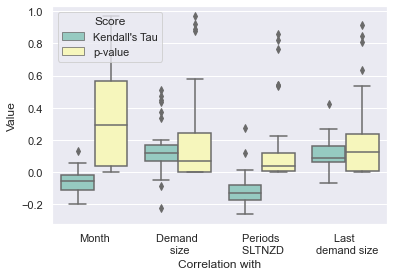

In [42]:
ax = sns.boxplot(x="Correlation with", y="Value", hue="Score",data=test_stat, palette="Set3")

# 7 steps ahead

In [3]:
data=pd.read_csv('forecast_res.csv')
data

,product,Samples,ADI,CV2,n_steps_in,n_steps_out,AUROC_HM,MASE_HM,MASE_NN,MASE_SES,...,MASE_Naive,MASE_ZF,RMSSE_HM,RMSSE_NN,RMSSE_SES,RMSSE_Cr,RMSSE_SBA,RMSSE_RNN,RMSSE_Naive,RMSSE_ZF
0,1000030181 PACK PUTIFICATION Q GARD 2,3425,16.349057,0.217962,30,7,0.920410,0.717719,0,1.075208,...,0.901398,0.622784,0.763250,0,0.780471,0.780060,0.780131,0,0.990784,0.803045
1,KS850 CUVETTES 20 CARTOUCHES,3465,14.952586,0.134347,30,7,0.943852,0.562934,0,1.080445,...,0.977861,0.596257,0.726102,0,0.772420,0.771941,0.771822,0,1.020093,0.797795
2,GELOSE M HINTON (BTE RONDE),2859,13.483568,0.171120,30,7,0.937496,0.452034,0,1.034501,...,0.517676,0.568502,0.649160,0,0.775632,0.775041,0.775130,0,0.733958,0.800703
3,STA DESORB U 00975,3003,17.396552,0.107503,30,7,0.921903,0.523256,0,0.943624,...,0.539624,0.494655,0.703060,0,0.681568,0.681747,0.681455,0,0.696900,0.699139
4,ROSENOW CYSTEINE 25T,2422,15.327044,0.159886,30,7,0.883013,0.446472,0,0.782010,...,0.553057,0.376079,0.598753,0,0.677484,0.677154,0.677116,0,0.846060,0.688143
5,KS807 SOLUTION NETTOYAGE ECHANTILLONS,3426,14.575630,0.144739,30,7,0.914283,0.644812,0,1.081268,...,1.043066,0.591071,0.793369,0,0.764863,0.764928,0.765082,0,1.049333,0.790877
6,KS855 CUVETTES REACTION LOCI,3479,14.044355,0.112439,30,7,0.923636,0.590060,0,1.012505,...,0.871465,0.543087,0.732426,0,0.721484,0.721390,0.721268,0,0.959468,0.746174
7,MHF sang cheval boite ronde,1771,13.639098,0.161395,30,7,0.941667,0.399264,0,0.726857,...,0.450496,0.396126,0.581940,0,0.630631,0.619296,0.624022,0,0.661632,0.631959
8,NACL 0.85%,2395,16.167785,0.353152,30,7,0.877315,0.206584,0,0.242005,...,0.163381,0.108921,0.179437,0,0.160628,0.160775,0.160526,0,0.226706,0.163753
9,KLIGLER 20 TUBES,1350,13.867347,1.012994,30,7,0.532258,0.438191,0,0.829861,...,0.552501,0.438191,0.596554,0,0.586686,0.585390,0.590039,0,0.560365,0.596554


In [4]:
data.describe()

,Samples,ADI,CV2,n_steps_in,n_steps_out,AUROC_HM,MASE_HM,MASE_NN,MASE_SES,MASE_Cr,...,MASE_Naive,MASE_ZF,RMSSE_HM,RMSSE_NN,RMSSE_SES,RMSSE_Cr,RMSSE_SBA,RMSSE_RNN,RMSSE_Naive,RMSSE_ZF
count,39.000000,39.000000,39.000000,39.0,39.0,39.000000,39.000000,39.0,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.0,39.000000,39.000000,39.000000,39.0,39.000000,39.000000
mean,2562.589744,16.453470,0.215441,30.0,7.0,0.846402,0.513046,0.0,0.887786,1.390737,...,0.648098,0.466416,0.643270,0.0,0.658122,0.784984,0.740801,0.0,0.759080,0.673724
std,606.648243,4.113202,0.184047,0.0,0.0,0.160881,0.160546,0.0,0.189573,2.355950,...,0.276716,0.120625,0.170572,0.0,0.151214,0.634315,0.437326,0.0,0.237337,0.155945
min,1350.000000,11.769231,0.057116,30.0,7.0,0.500000,0.167027,0.0,0.242005,0.241199,...,0.163381,0.108921,0.179437,0.0,0.160628,0.160775,0.160526,0.0,0.226706,0.163753
25%,2237.500000,14.018390,0.118620,30.0,7.0,0.826133,0.439164,0.0,0.771903,0.777514,...,0.435692,0.397874,0.584542,0.0,0.598851,0.599132,0.601652,0.0,0.603207,0.611148
50%,2707.000000,14.952586,0.165764,30.0,7.0,0.919355,0.523256,0.0,0.915364,0.914164,...,0.556237,0.478907,0.682633,0.0,0.681552,0.681231,0.681358,0.0,0.793063,0.691006
75%,2895.000000,16.872804,0.235142,30.0,7.0,0.944716,0.578937,0.0,1.021305,1.039017,...,0.876157,0.555062,0.750352,0.0,0.762513,0.766820,0.762374,0.0,0.945866,0.784254
max,3479.000000,28.197531,1.012994,30.0,7.0,1.000000,0.996572,0.0,1.189305,14.436443,...,1.187720,0.688533,0.928516,0.0,0.917157,4.148618,2.620941,0.0,1.210637,0.928516


In [6]:
data.describe().iloc[:,[6,7,8,9,10,11,12,13]]

,MASE_HM,MASE_NN,MASE_SES,MASE_Cr,MASE_SBA,MASE_RNN,MASE_Naive,MASE_ZF
count,39.000000,39.0,39.000000,39.000000,39.000000,39.0,39.000000,39.000000
mean,0.513046,0.0,0.887786,1.390737,1.207104,0.0,0.648098,0.466416
std,0.160546,0.0,0.189573,2.355950,1.474153,0.0,0.276716,0.120625
min,0.167027,0.0,0.242005,0.241199,0.231866,0.0,0.163381,0.108921
25%,0.439164,0.0,0.771903,0.777514,0.756059,0.0,0.435692,0.397874
50%,0.523256,0.0,0.915364,0.914164,0.920129,0.0,0.556237,0.478907
75%,0.578937,0.0,1.021305,1.039017,1.046606,0.0,0.876157,0.555062
max,0.996572,0.0,1.189305,14.436443,7.906322,0.0,1.187720,0.688533


In [9]:
data.describe().iloc[:,[14,15,16,17,18,19,20,21]]

,RMSSE_HM,RMSSE_NN,RMSSE_SES,RMSSE_Cr,RMSSE_SBA,RMSSE_RNN,RMSSE_Naive,RMSSE_ZF
count,39.000000,39.0,39.000000,39.000000,39.000000,39.0,39.000000,39.000000
mean,0.643270,0.0,0.658122,0.784984,0.740801,0.0,0.759080,0.673724
std,0.170572,0.0,0.151214,0.634315,0.437326,0.0,0.237337,0.155945
min,0.179437,0.0,0.160628,0.160775,0.160526,0.0,0.226706,0.163753
25%,0.584542,0.0,0.598851,0.599132,0.601652,0.0,0.603207,0.611148
50%,0.682633,0.0,0.681552,0.681231,0.681358,0.0,0.793063,0.691006
75%,0.750352,0.0,0.762513,0.766820,0.762374,0.0,0.945866,0.784254
max,0.928516,0.0,0.917157,4.148618,2.620941,0.0,1.210637,0.928516


In [11]:
bins = pd.IntervalIndex.from_tuples([(1000, 1500), (1500, 2000), (2000, 2500), (2500, 3000),(3000, 3500)])
data['SamplesBand'] = pd.cut(data['Samples'], bins)
data[['SamplesBand', 'RMSSE_HM','RMSSE_NN','RMSSE_RNN','RMSSE_SES','RMSSE_Cr','RMSSE_SBA','RMSSE_Naive','RMSSE_ZF']].groupby(['SamplesBand'], as_index=False).mean()

,SamplesBand,RMSSE_HM,RMSSE_NN,RMSSE_RNN,RMSSE_SES,RMSSE_Cr,RMSSE_SBA,RMSSE_Naive,RMSSE_ZF
0,"(1000, 1500]",0.654158,0.0,0.0,0.633445,0.632366,0.634180,0.604482,0.650443
1,"(1500, 2000]",0.779377,0.0,0.0,0.755234,1.443247,1.098088,0.922854,0.767086
2,"(2000, 2500]",0.582884,0.0,0.0,0.601996,0.601533,0.601431,0.673646,0.614003
3,"(2500, 3000]",0.578372,0.0,0.0,0.625236,0.751728,0.751602,0.679067,0.640197
4,"(3000, 3500]",0.734500,0.0,0.0,0.733185,0.732931,0.732911,0.952190,0.756511


In [13]:
bins = pd.IntervalIndex.from_tuples([(10, 12.5), (12.5, 15), (15, 17.5), (17.5, 20), (20, 22.5), (22.5, 25), (25, 27.5), (27.5, 30)])
data['ADIBand'] = pd.cut(data['ADI'], bins)
data[['ADIBand', 'RMSSE_HM','RMSSE_RNN','RMSSE_NN','RMSSE_Cr','RMSSE_SBA','RMSSE_SES','RMSSE_Naive','RMSSE_ZF']].groupby(['ADIBand'], as_index=False).mean()

,ADIBand,RMSSE_HM,RMSSE_RNN,RMSSE_NN,RMSSE_Cr,RMSSE_SBA,RMSSE_SES,RMSSE_Naive,RMSSE_ZF
0,"(10.0, 12.5]",0.542264,0.0,0.0,0.531021,0.531033,0.531544,0.552426,0.547612
1,"(12.5, 15.0]",0.614082,0.0,0.0,0.727815,0.728413,0.653388,0.686632,0.670253
2,"(15.0, 17.5]",0.647681,0.0,0.0,0.645557,0.837646,0.645516,0.808018,0.661982
3,"(17.5, 20.0]",0.697980,0.0,0.0,0.664642,0.664253,0.664347,0.852409,0.677920
4,"(20.0, 22.5]",0.707597,0.0,0.0,4.148618,0.686494,0.687685,0.943831,0.700779
5,"(22.5, 25.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"(25.0, 27.5]",0.657740,0.0,0.0,0.656109,0.656187,0.657018,0.940973,0.666376
7,"(27.5, 30.0]",0.809761,0.0,0.0,0.798823,0.798621,0.799354,0.905747,0.809761


In [15]:
bins = pd.IntervalIndex.from_tuples([(0,0.49) ,  (0.5,1.02)])
data['CV2Band'] = pd.cut(data['CV2'], bins)
data[['CV2Band', 'RMSSE_HM','RMSSE_NN','RMSSE_RNN','RMSSE_SES','RMSSE_Cr','RMSSE_SBA','RMSSE_Naive','RMSSE_ZF']].groupby(['CV2Band'], as_index=False).mean()

,CV2Band,RMSSE_HM,RMSSE_NN,RMSSE_RNN,RMSSE_SES,RMSSE_Cr,RMSSE_SBA,RMSSE_Naive,RMSSE_ZF
0,"(0.0, 0.49]",0.652410,0.0,0.0,0.666001,0.799771,0.753056,0.771841,0.681900
1,"(0.5, 1.02]",0.474192,0.0,0.0,0.512371,0.511433,0.514085,0.523007,0.522474
